##  Previsão de Vendas para o Grupo Boticário - Previsão
##### O objetivo desse desafio é desenvolver um modelo para previsão de vendas (sell-out) para integrar o processo de planejamento de demanda do grupo. Este processo tem como objetivo orientar o plano de produção da indústria. Em outras palavras, a partir dessa previsão de vendas a Indústria irá estabelecer quais produtos e quando fabricá-los.

- Justificar a abordagem escolhida para a modelagem;
- Justificar a escolha da(s) métrica(s) de avaliação do modelo;
- Separar os entregáveis 1 e 2 em dois Jupyter Notebooks;
- Utilize os notebooks para responder questionamentos e discutir sobre resultados;
- Subir os entregáveis no GitHub e enviar o link 


#### Importação de bibliotecas: Indica as bibliotecas necessárias.

In [1]:
# Importar bibliotecas necessárias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregamento do dataset

In [3]:
dataset = pd.read_csv('/home/carlos/Documents/pessoal/case_previsao_vendas/dataset_to_predict.csv', delimiter=',')
dataset.head(3)

,Unnamed: 0,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,QT_VENDA_BRUTO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_E,Ciclo,Data
0,68524,201801,0,443142,0,5,6,1,10068.0,294.000000,294270.0,600000.0,281610.0,180000.0,1.0,1,2018-01-07
1,2515,201801,0,147546,7,5,20,0,240.0,293.425546,413.0,400000.0,413.0,400000.0,0.0,1,2018-01-07
2,94744,201801,0,420630,7,5,20,1,2388.0,335.404558,43003.0,80000.0,43003.0,80000.0,1.0,1,2018-01-07


In [8]:
if 'Data' in dataset.columns:
    dataset['Data'] = pd.to_datetime(dataset['Data']).astype(int) / 10**9

#### Separação das features e target

In [9]:
X = dataset.drop(columns=['VL_RECEITA_BRUTA'])  #
y = dataset['VL_RECEITA_BRUTA']

#### Divisão dos dados

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Padronização dos dados

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Construção do modelo

In [12]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

#### Otimização do modelo

In [15]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=2, verbose=2)
grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  59.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  56.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  52.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  58.7s
[CV] END max

/home/carlos/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  33.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  34.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.8min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  35.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  31.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  32.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total t

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

#### Previsão e avaliação

In [17]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

In [18]:
print(y_pred[:5])

[429.84271429 336.75097746 406.0791178  247.968      294.16569744]


#### Plotagem e importância das features

##### **Conclusão:** O modelo de previsão de vendas apresenta uma boa capacidade de explicação (R² alto), mas os erros médios (MAE e RMSE) indicam que ainda há uma variação significativa entre as previsões e os valores reais. Focar na redução desses erros pode melhorar ainda mais a precisão das previsões.

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


MAE: 52.87717252973794
RMSE: 233.88154751616608
R^2: 0.9124217353808087


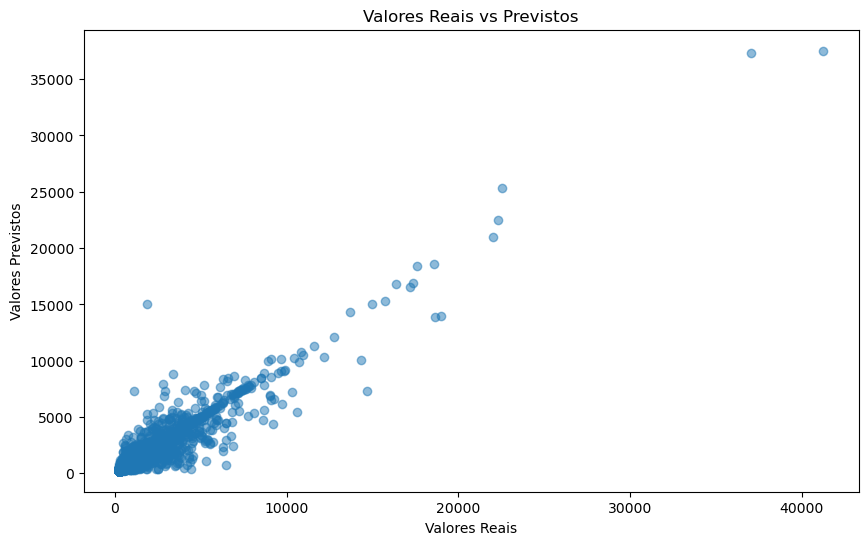

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Previstos')
plt.show()


## Insight Resumido:

#### 1. Dispersão dos Valores:

##### **- Concentração Principal:** Muitos pontos estão agrupados, indicando previsões geralmente confiáveis em certos intervalos.
##### **- Desvios Notáveis:** Pontos fora da área de concentração podem indicar outliers ou previsões menos precisas.

#### 2. Tendência Geral:

##### **- Perto da Linha Diagonal:** A maioria dos pontos está perto da linha diagonal, sugerindo que o modelo faz previsões razoavelmente boas, mas com algumas variações.

#### 3. Recomendações:

##### **- Investigar Outliers:** Analise os pontos distantes para entender e corrigir erros de previsão.
##### **- Ajustar o Modelo:** Melhore a precisão ajustando o modelo ou testando novos algoritmos.

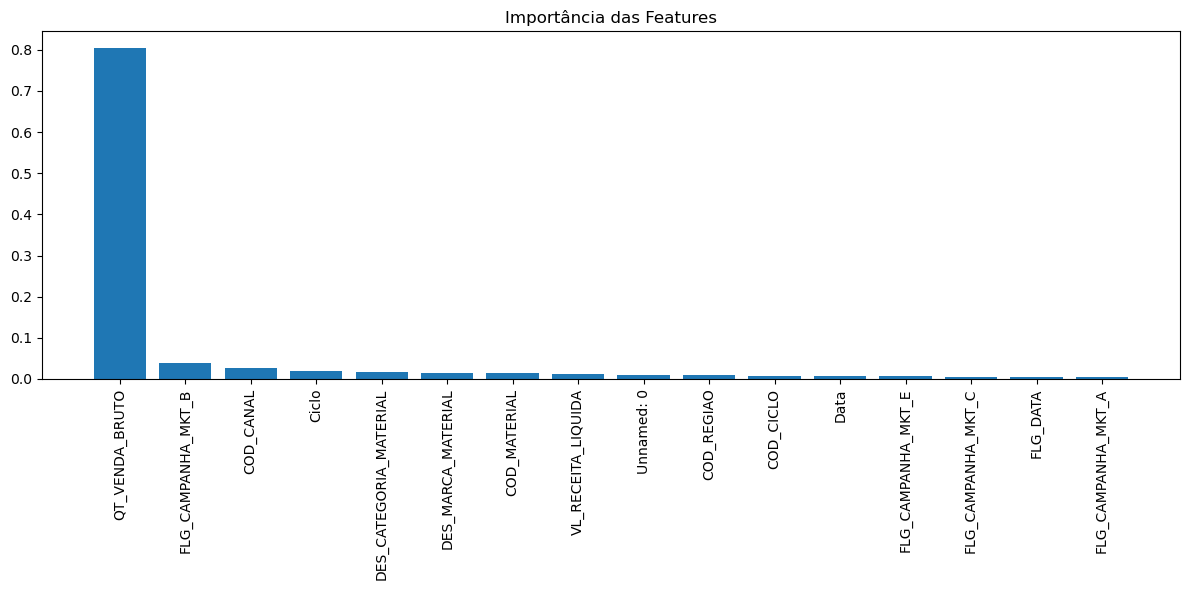

In [21]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importância das Features")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


#### Exportação do modelo

In [23]:
import joblib
joblib.dump(best_rf, 'modelo_vendas_boticario.pkl')


['modelo_vendas_boticario.pkl']